In [3]:
import torch
from spikingjelly.activation_based import neuron 
from spikingjelly import visualizing
from matplotlib import pyplot as plt

In [4]:
if_layer = neuron.IFNode()
if_layer.v

0.0

In [5]:
#_ if_layer = neuron.IFNode()
x = torch.rand(size=[2, 3])
y = if_layer(x)
print( x.shape , if_layer.v.shape )
if_layer.reset()


torch.Size([2, 3]) torch.Size([2, 3])


In [6]:
#_ if_layer = neuron.IFNode()
x = torch.rand(size=[2, 3])
y = if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
if_layer.reset()

x = torch.rand(size=[4, 5, 6])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([4, 5, 6]), if_layer.v.shape=torch.Size([4, 5, 6])
if_layer.reset()

x.shape=torch.Size([2, 3]), if_layer.v.shape=torch.Size([2, 3])
x.shape=torch.Size([4, 5, 6]), if_layer.v.shape=torch.Size([4, 5, 6])


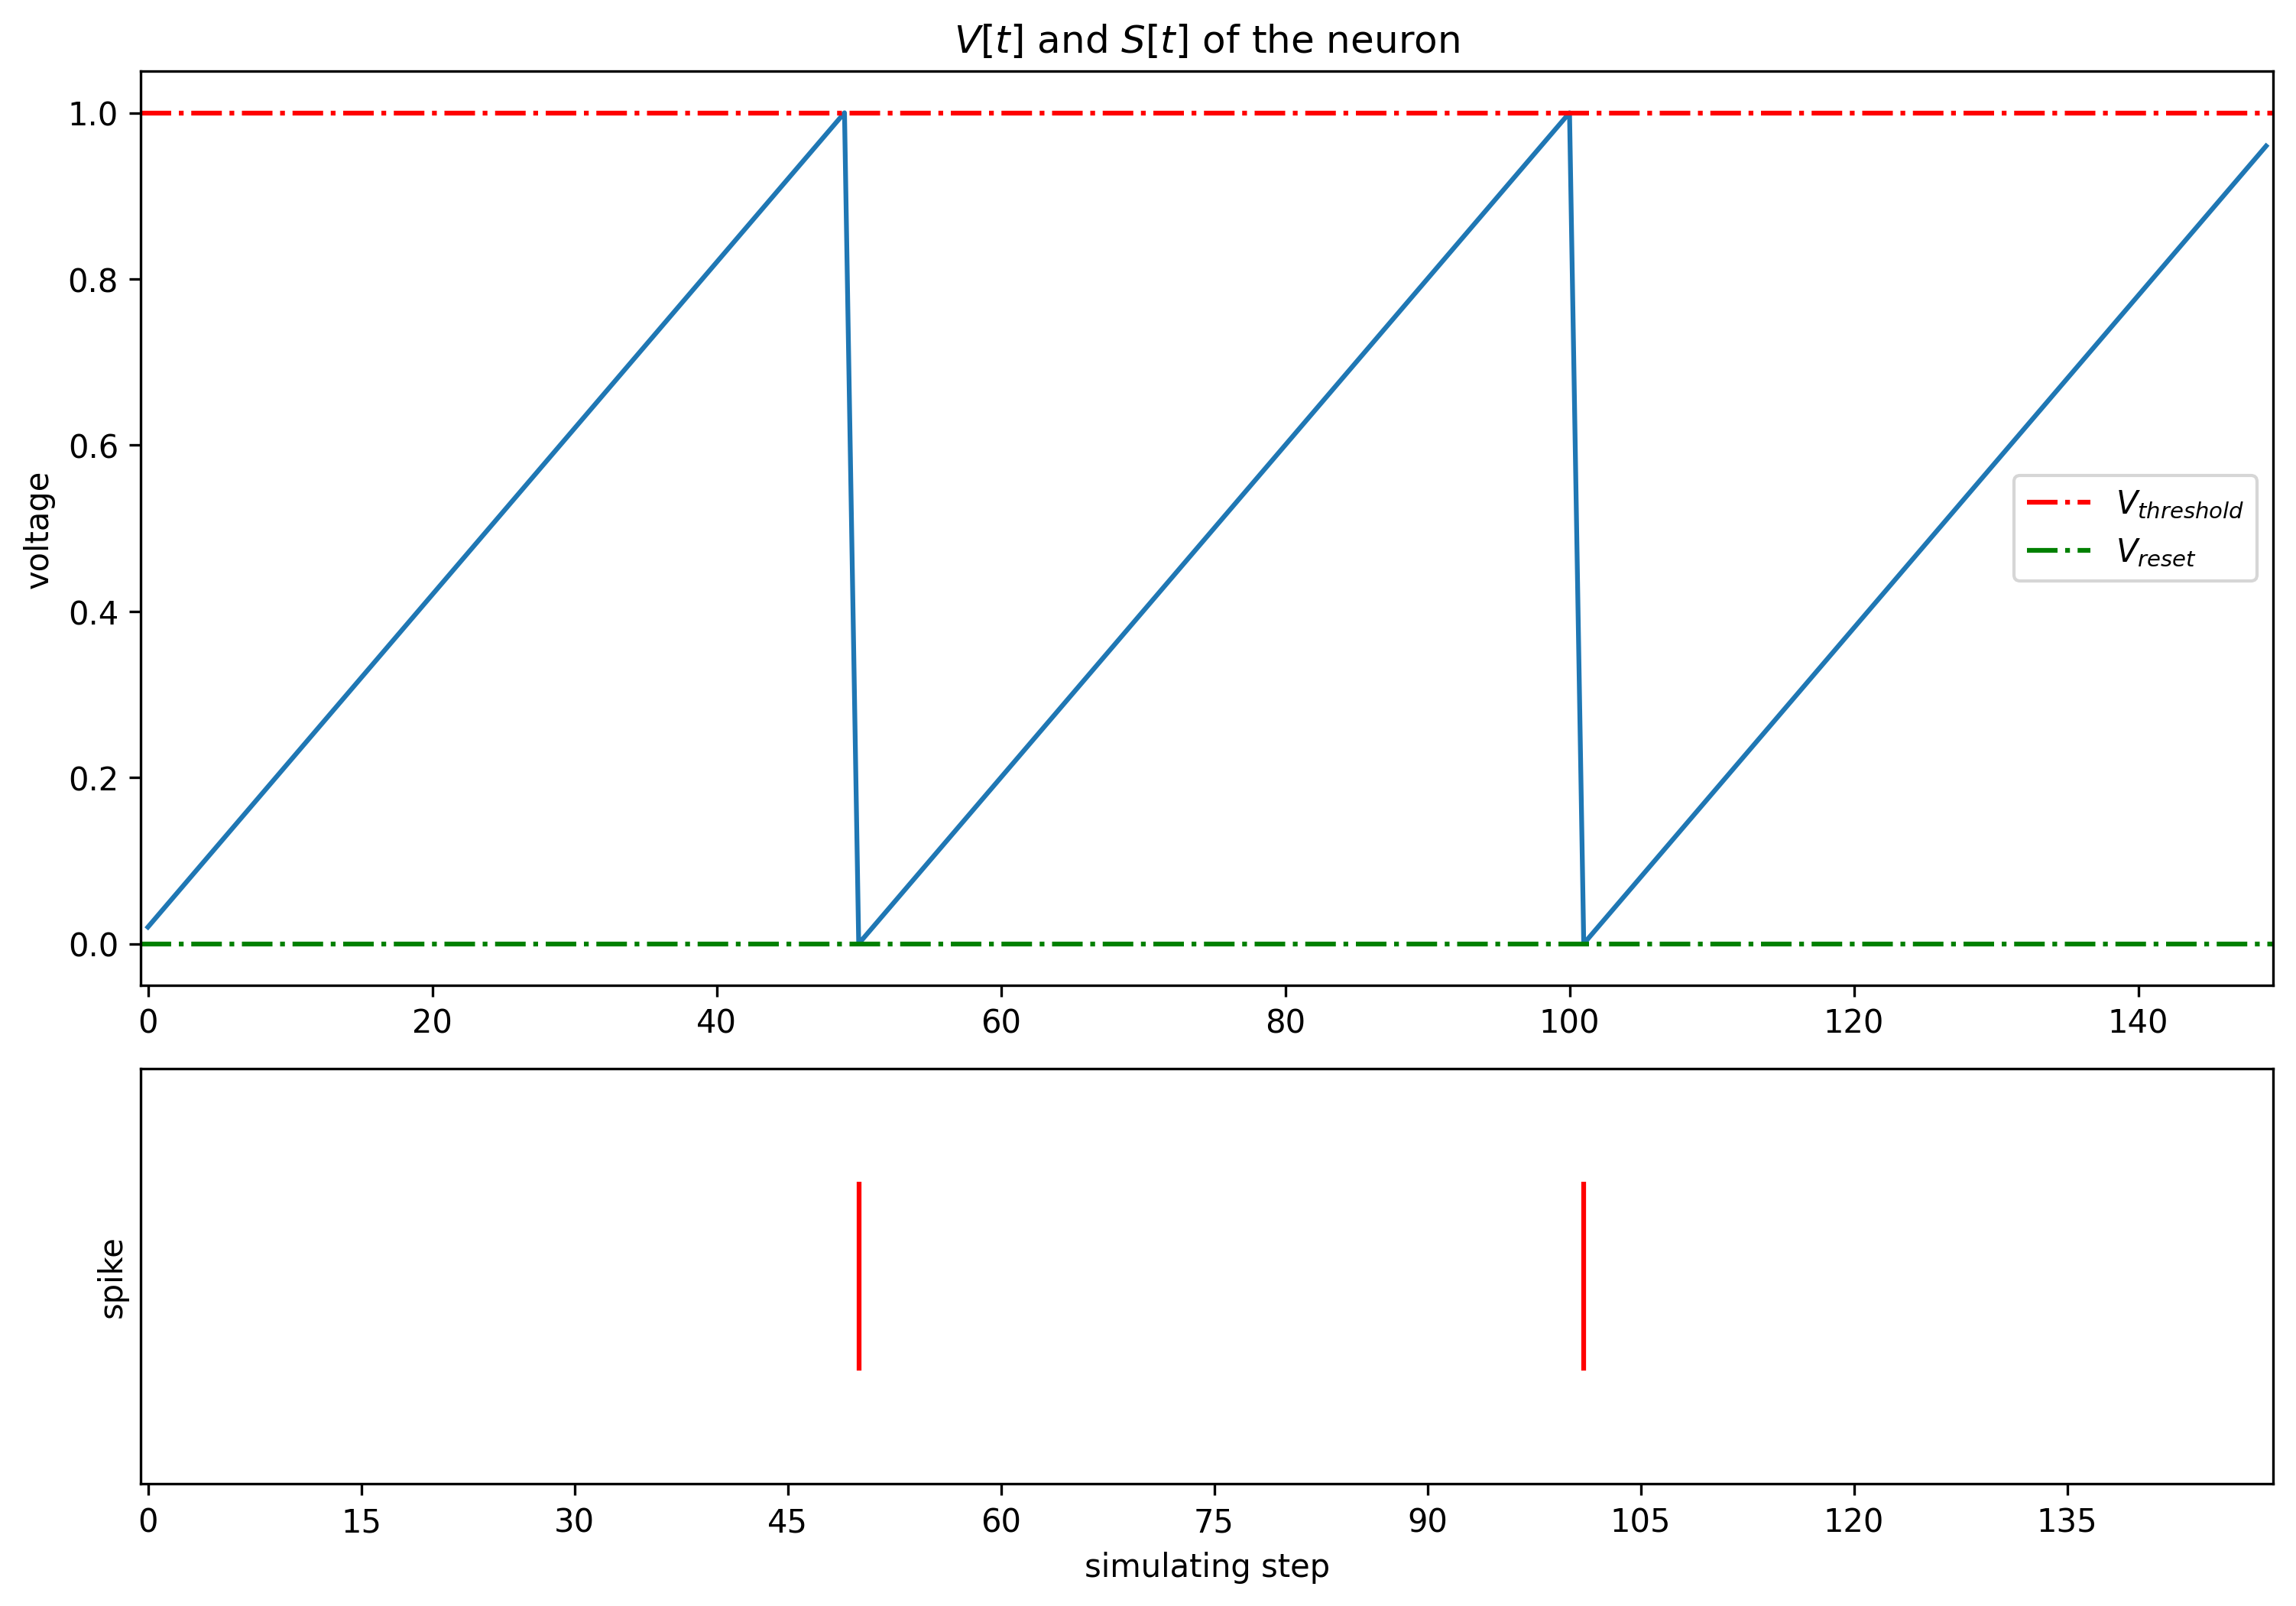

In [12]:
if_layer.reset()
x = torch.as_tensor([0.02])
T = 150
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x))
    v_list.append(if_layer.v)

dpi = 300
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), 
                                torch.cat(s_list).numpy(),
                                v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

In [19]:
len( v_list )

150

In [20]:
v_list

[tensor([0.0200]),
 tensor([0.0400]),
 tensor([0.0600]),
 tensor([0.0800]),
 tensor([0.1000]),
 tensor([0.1200]),
 tensor([0.1400]),
 tensor([0.1600]),
 tensor([0.1800]),
 tensor([0.2000]),
 tensor([0.2200]),
 tensor([0.2400]),
 tensor([0.2600]),
 tensor([0.2800]),
 tensor([0.3000]),
 tensor([0.3200]),
 tensor([0.3400]),
 tensor([0.3600]),
 tensor([0.3800]),
 tensor([0.4000]),
 tensor([0.4200]),
 tensor([0.4400]),
 tensor([0.4600]),
 tensor([0.4800]),
 tensor([0.5000]),
 tensor([0.5200]),
 tensor([0.5400]),
 tensor([0.5600]),
 tensor([0.5800]),
 tensor([0.6000]),
 tensor([0.6200]),
 tensor([0.6400]),
 tensor([0.6600]),
 tensor([0.6800]),
 tensor([0.7000]),
 tensor([0.7200]),
 tensor([0.7400]),
 tensor([0.7600]),
 tensor([0.7800]),
 tensor([0.8000]),
 tensor([0.8200]),
 tensor([0.8400]),
 tensor([0.8600]),
 tensor([0.8800]),
 tensor([0.9000]),
 tensor([0.9200]),
 tensor([0.9400]),
 tensor([0.9600]),
 tensor([0.9800]),
 tensor([1.0000]),
 tensor([0.]),
 tensor([0.0200]),
 tensor([0.0400]

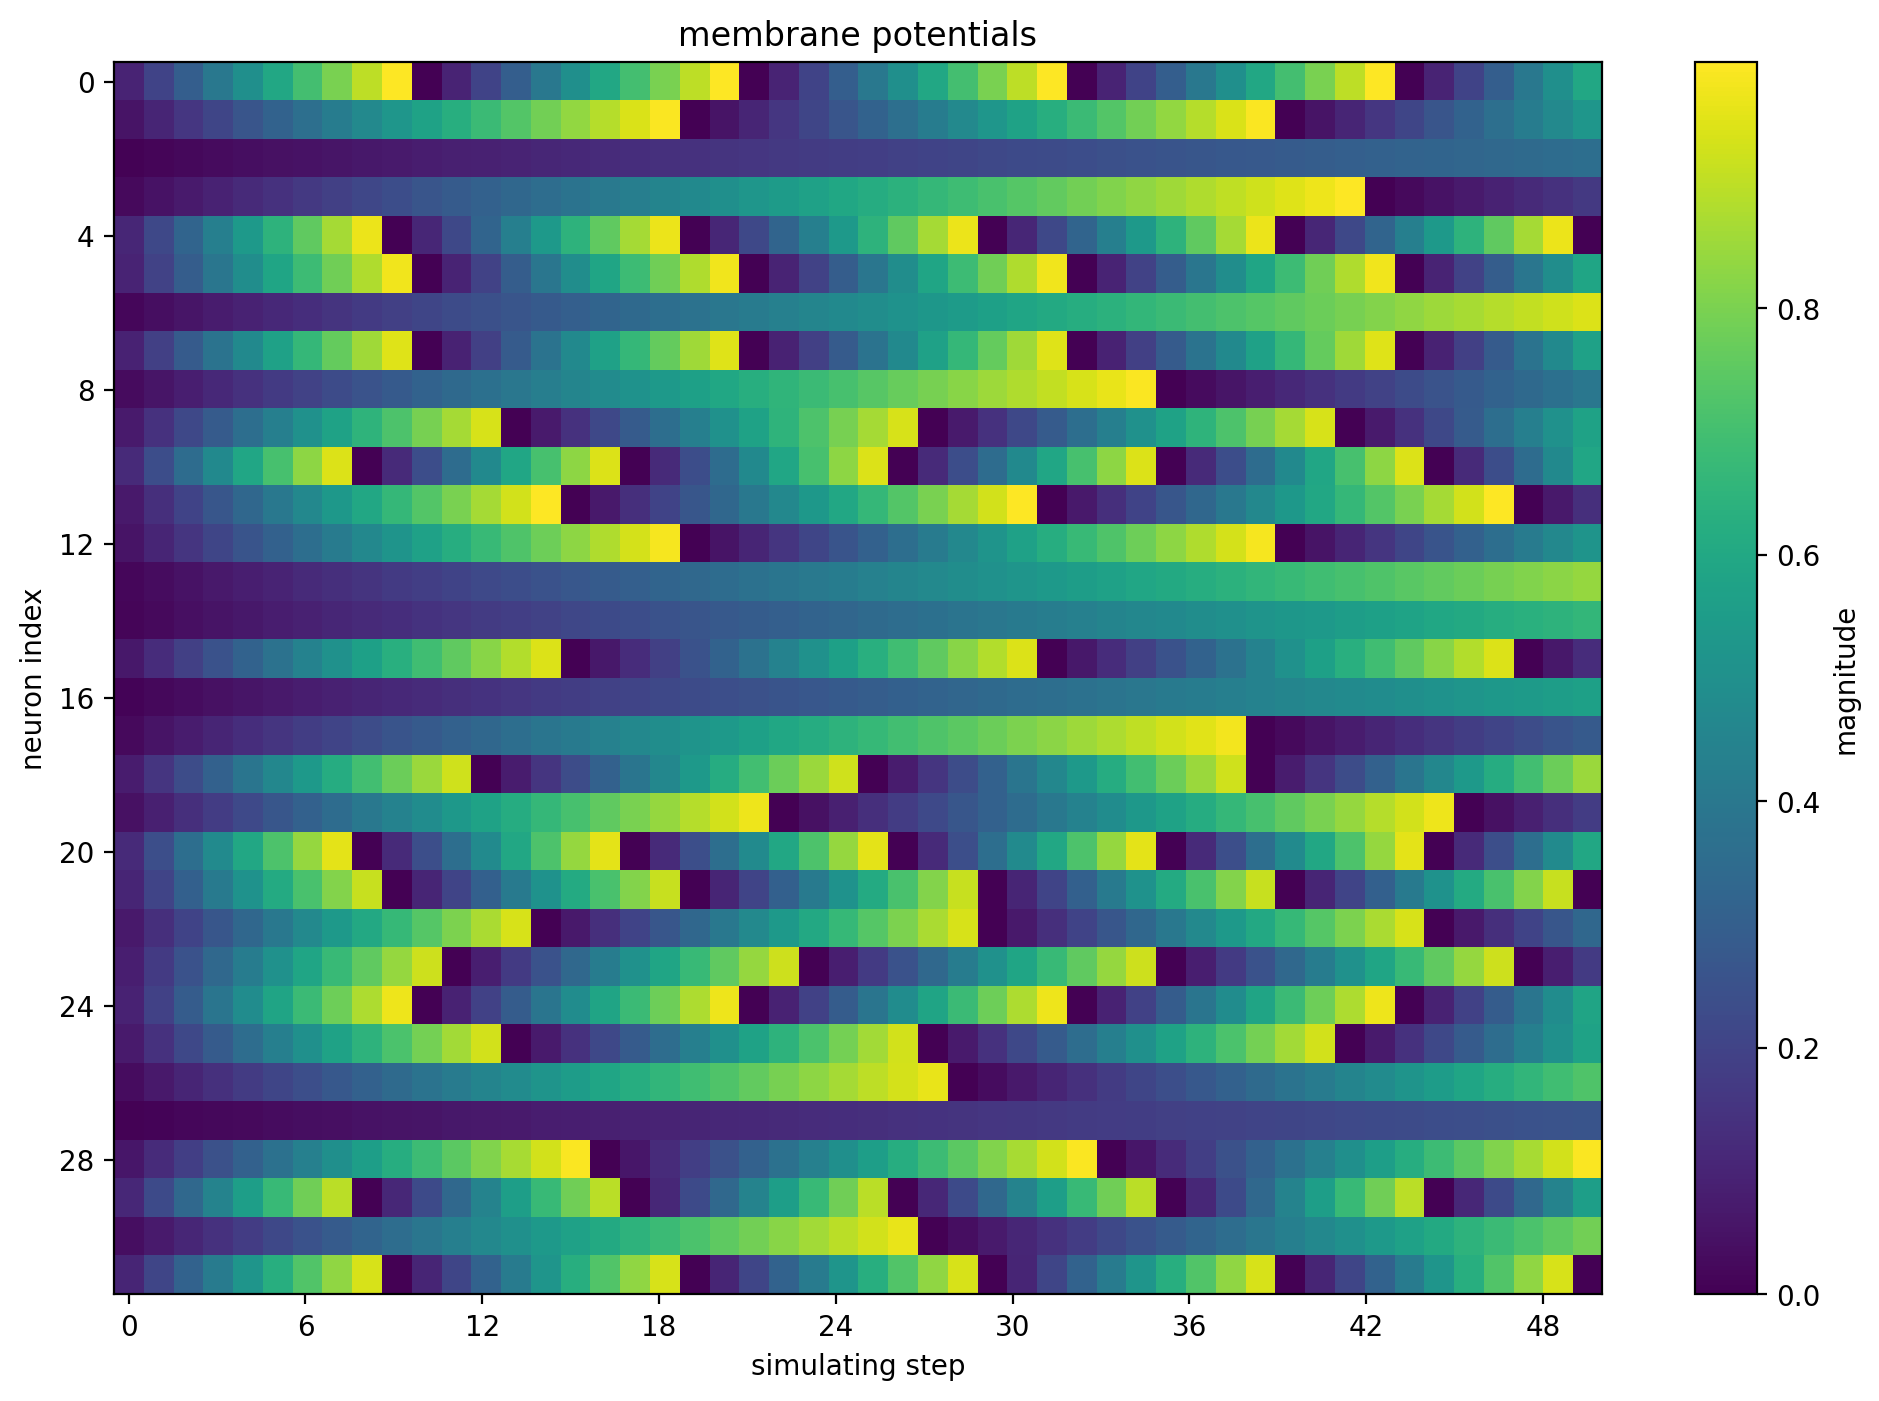

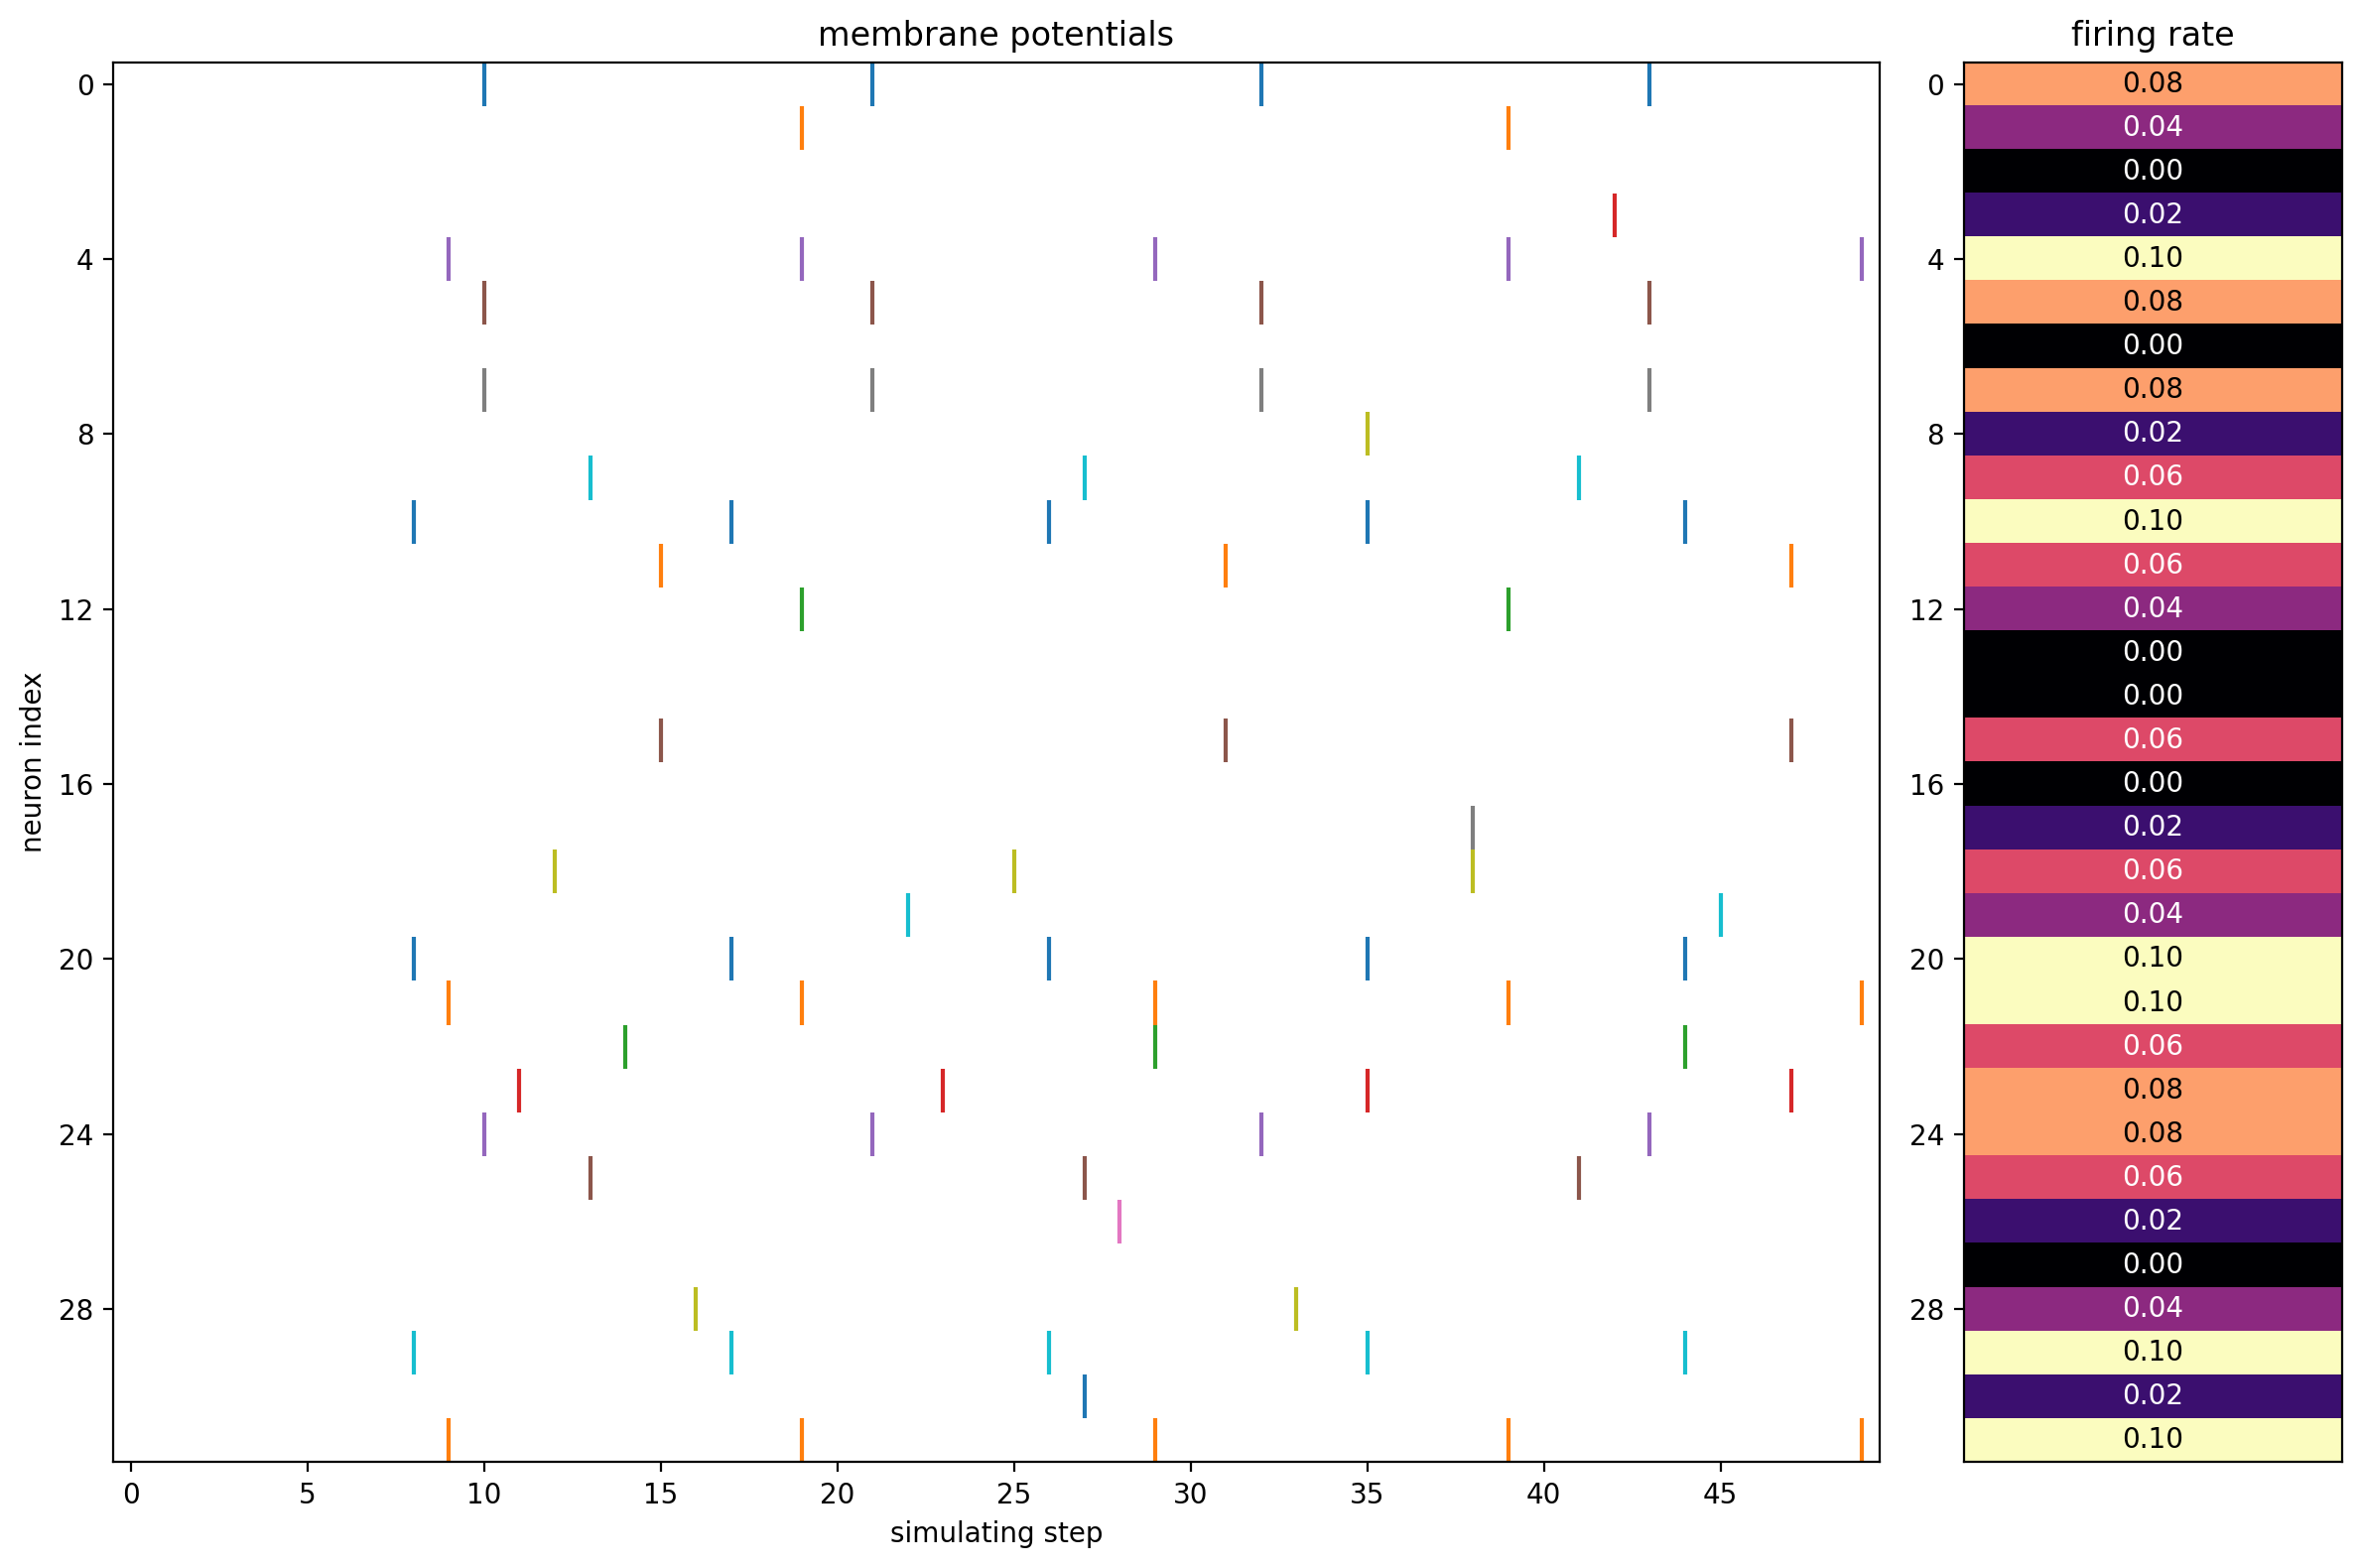

In [7]:
if_layer.reset()
T = 50
x = torch.rand([32]) / 8.
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x).unsqueeze(0))
    v_list.append(if_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

figsize = (12, 8)
dpi = 200
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane potentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

In [32]:
type( s_list ) , len( s_list )

(torch.Tensor, 50)

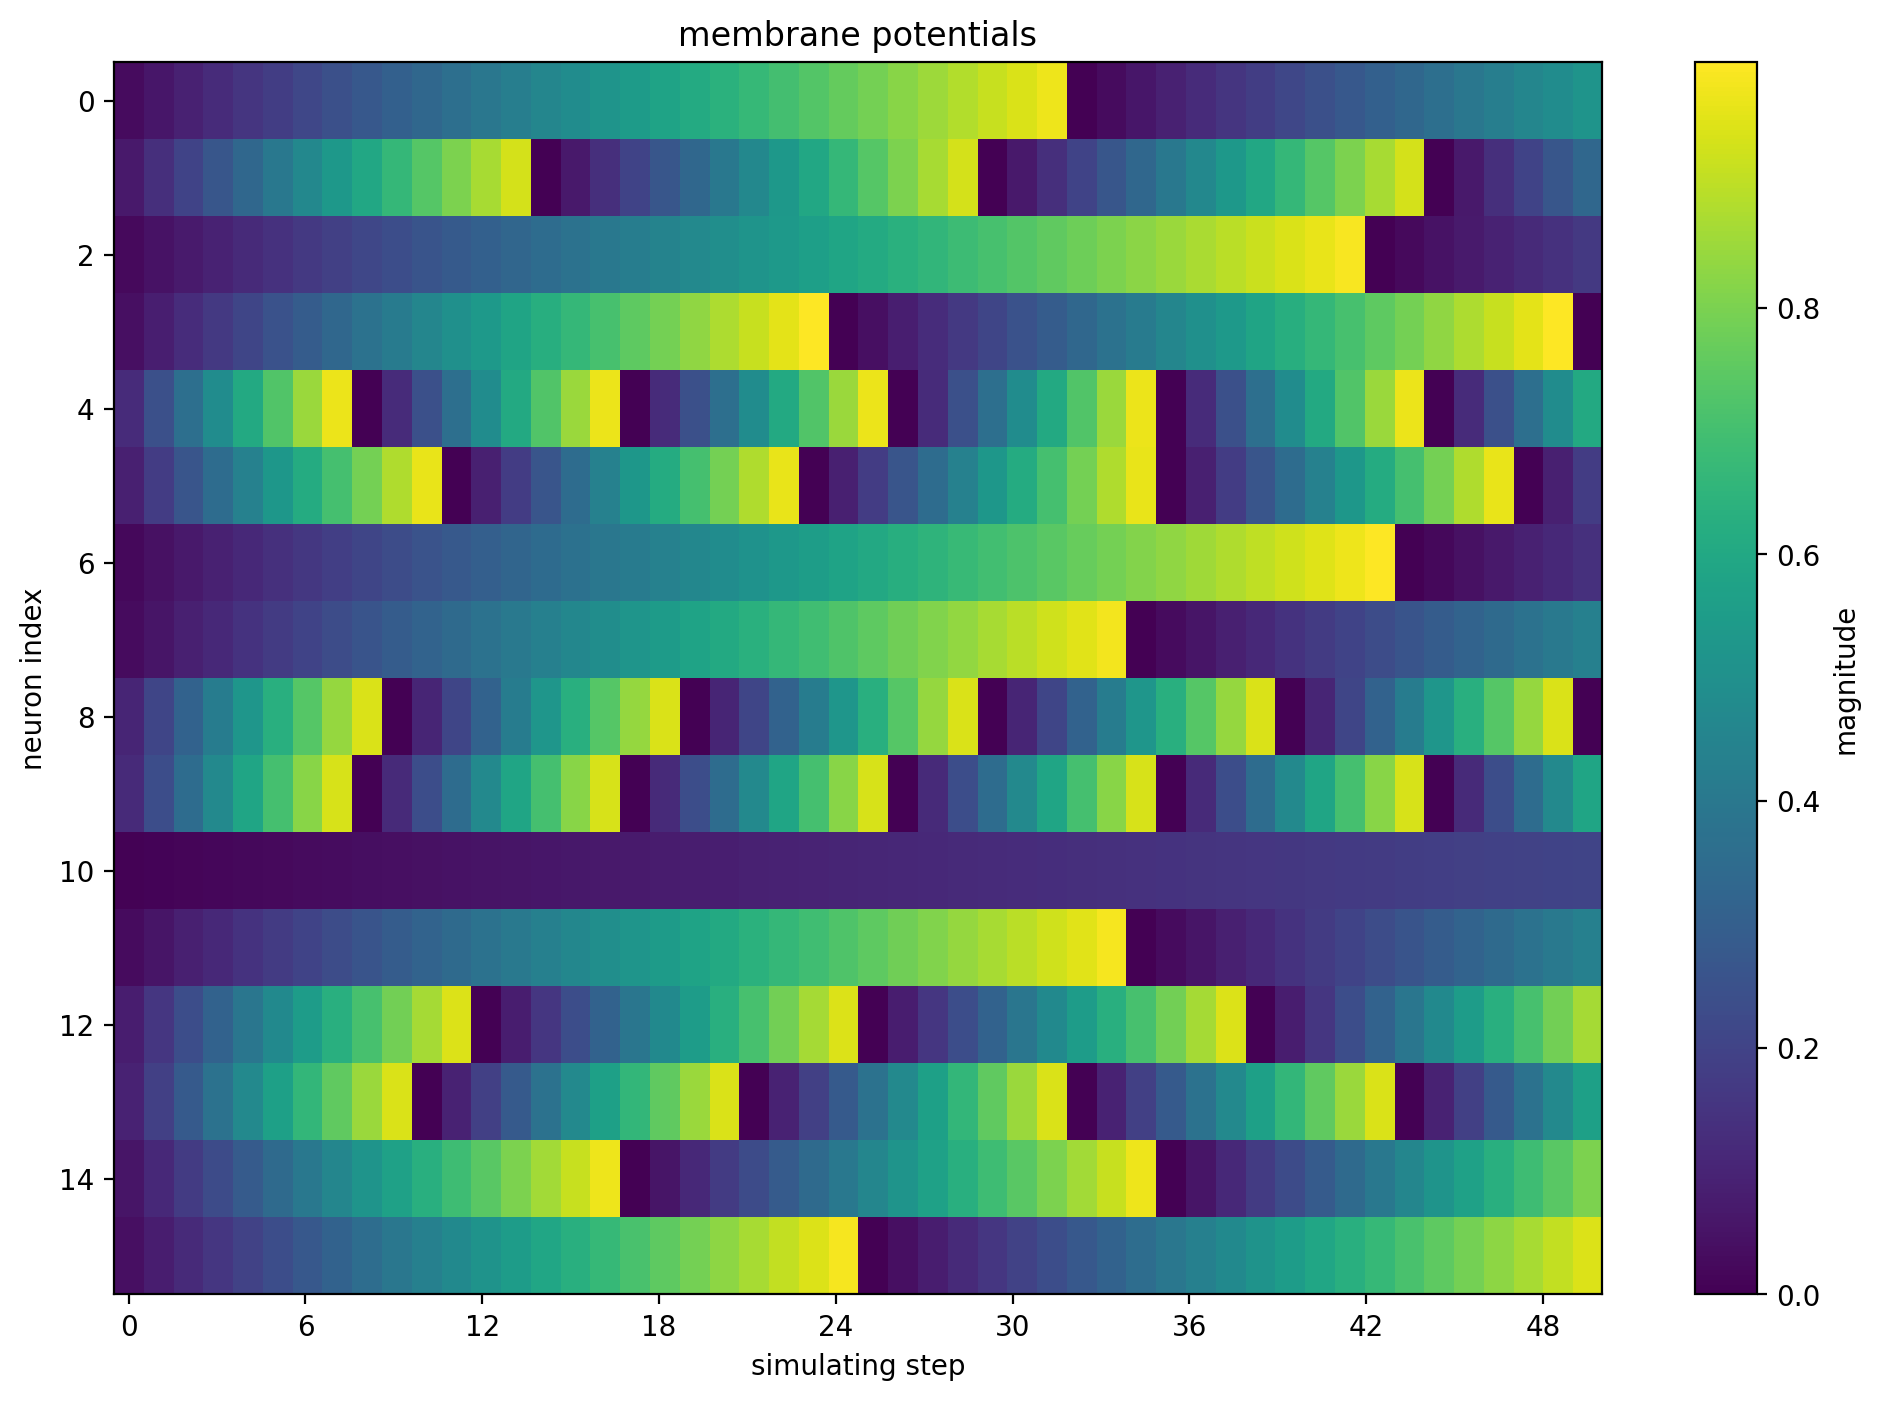

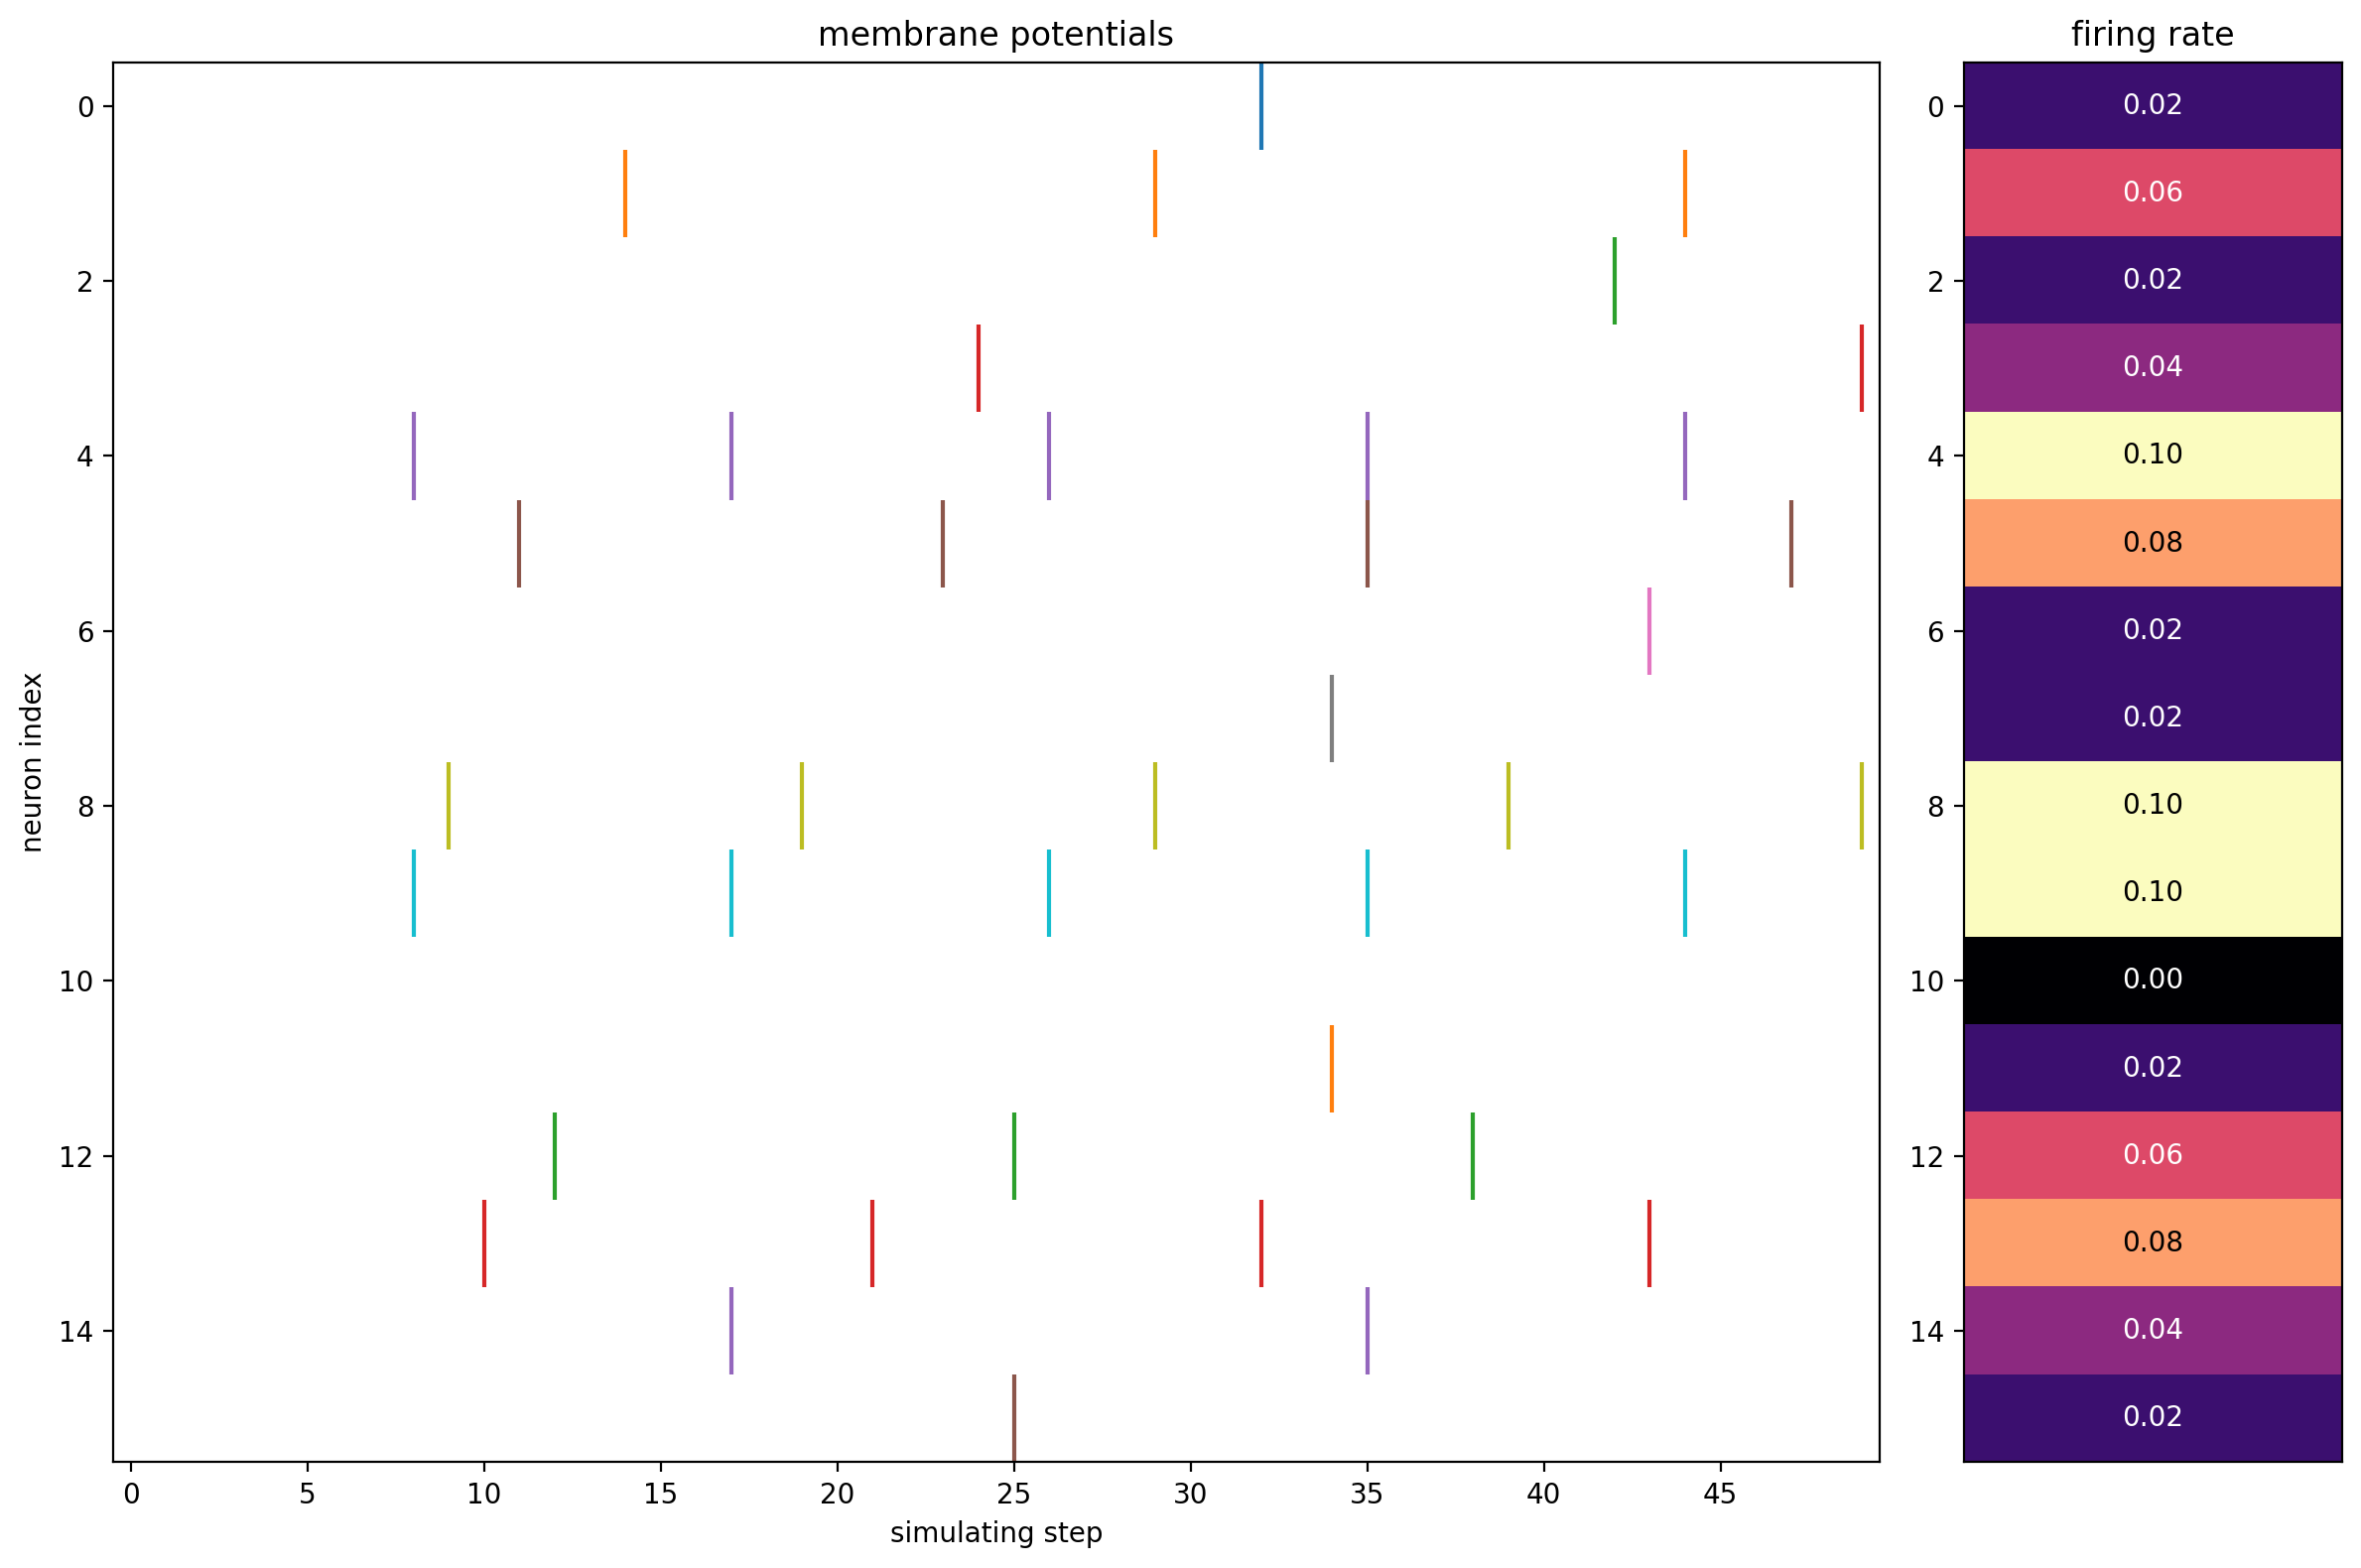

In [37]:
if_layer.reset()
T = 50
x = torch.rand([16]) / 8.
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x).unsqueeze(0))
    v_list.append(if_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

figsize = (12, 8)
dpi = 200
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane potentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

In [38]:
class SquareIFNode(neuron.BaseNode):

    def neuronal_charge(self, x: torch.Tensor):
        self.v = self.v + x ** 2

sif_layer = SquareIFNode()

T = 4
N = 1
x_seq = torch.rand([T, N])
print(f'x_seq={x_seq}')

for t in range(T):
    yt = sif_layer(x_seq[t])
    print(f'sif_layer.v[{t}]={sif_layer.v}')

sif_layer.reset()
sif_layer.step_mode = 'm'
y_seq = sif_layer(x_seq)
print(f'y_seq={y_seq}')
sif_layer.reset()

x_seq=tensor([[0.0894],
        [0.8207],
        [0.3181],
        [0.3252]])
sif_layer.v[0]=tensor([0.0080])
sif_layer.v[1]=tensor([0.6816])
sif_layer.v[2]=tensor([0.7828])
sif_layer.v[3]=tensor([0.8885])
y_seq=tensor([[0.],
        [0.],
        [0.],
        [0.]])
